In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

#data cleanup

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Seaborn URL: https://seaborn.pydata.org/ 

#### Installing and importing Seaborn

In [2]:
import seaborn as sns

#### Customising bar charts from Lesson 19

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
#filtering

df_DA_US = df_DA_US.explode('job_skills')
df_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
#grouping

df_DA_top_pay =  df_group.sort_values(by='median', ascending=False).head(10)
df_DA_demand = df_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
#sorting


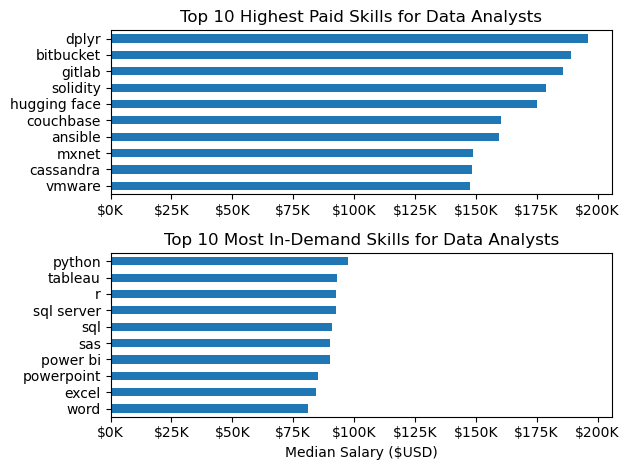

In [15]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax = ax[0], legend=False) #[::-1] is aanother way to order in reverse
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


df_DA_demand[::-1].plot(kind='barh', y='median', ax = ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim()) # this ensures x axis on both graphs are perfectly matched

fig.tight_layout()

#### Seaborn Modifications

Here, we can use:

- seaborn.barplot()

which includes paramters data (dataframe), x, y and has many more additional parameters such as:

- hue: here we specify which column we want to base the color gradient from 
- palette: selects the colour palette for the gradient. Here, we want to select 'sequential': as it goes from h a high value to a low value, we want to color it in a gradient type format

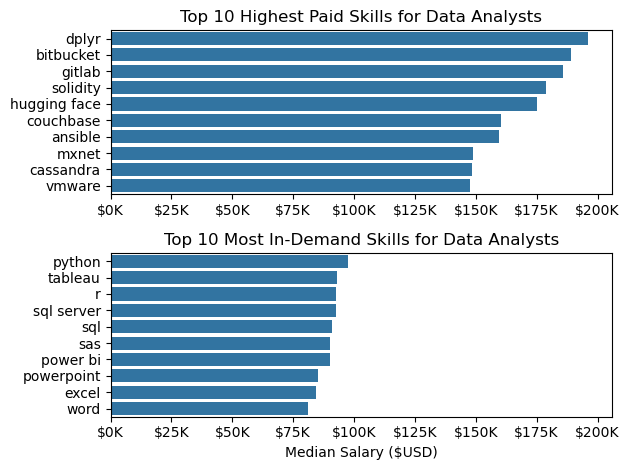

In [10]:
fig, ax = plt.subplots(2, 1)

#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax = ax[0], legend=False) #[::-1] is aanother way to order in reverse
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax = ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


#df_DA_demand[::-1].plot(kind='barh', y='median', ax = ax[1], legend=False)
sns.barplot(data=df_DA_demand, x='median', y=df_DA_demand.index, ax = ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim()) 

fig.tight_layout()

With seaborn, you can also alter the themes of graphs

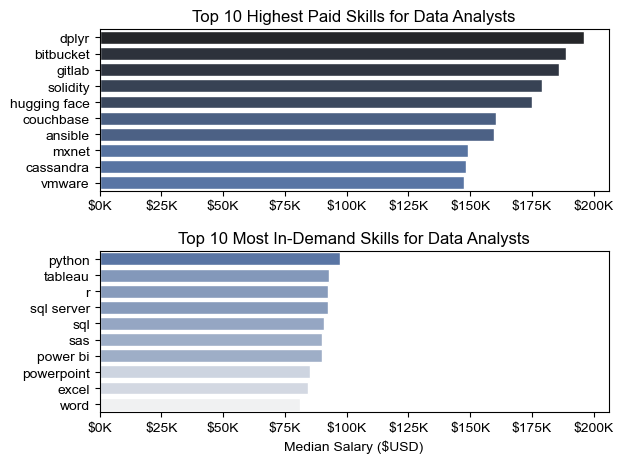

In [16]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax = ax[0], legend=False) #[::-1] is aanother way to order in reverse
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax = ax[0], hue='median', palette='dark:b_r') # _r reverses order of gradient
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


#df_DA_demand.plot(kind='barh', y='median', ax = ax[1], legend=False)
sns.barplot(data=df_DA_demand, x='median', y=df_DA_demand.index, ax = ax[1], hue='median', palette='light:b')
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim()) 

fig.tight_layout()

#### Customising histogram from from Lesson 17

- seborn.histplot()
- seaborn.distplot() : used for a smoother distribution curve. Key paramters involve 'data' and 'kind'

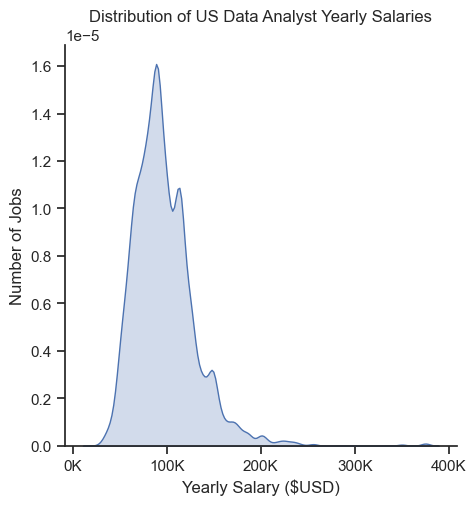

In [19]:
#df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

sns.displot(data=df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()

#### Customising boxplot from from Lesson 18

- seaborn.boxplot()

Note: previously, we have specified the data as a series of values for the 'salary_year_avg' but here we need to provide the entire dataframee for the data parameter along with x and y values.


In [24]:
job_titles= ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_data = df[(df['job_title_short'].isin (job_titles)) & (df['job_country'] == 'United States')]
df_data = df_data.dropna(subset='salary_year_avg')


/var/folders/jv/clmqn0155vd65yhxvfy5c4xr0000gn/T/ipykernel_3210/3610889548.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


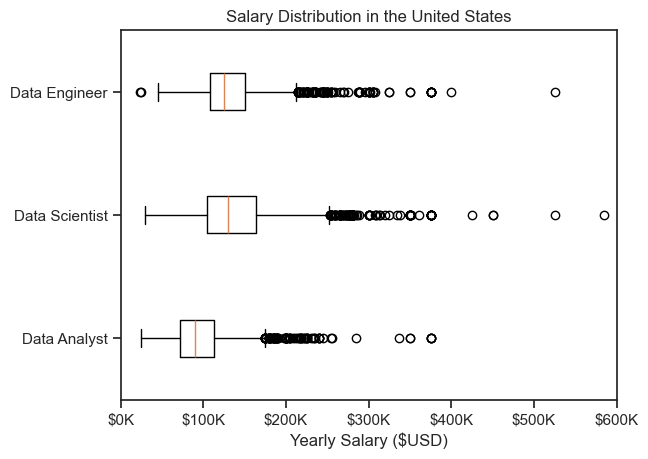

In [25]:
job_list = [df_data[df_data['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax_att = plt.gca()
ax_att.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

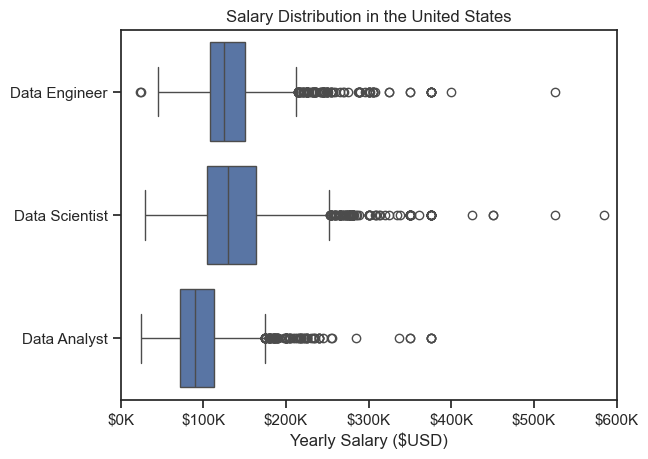

In [28]:
sns.boxplot(data=df_data, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)

ax_att = plt.gca()
ax_att.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()